# (Core) Resampling Datetime Data

# part 1

## tasks
You must first load the data and create a datetime index.

1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth
4. Impute any missing values.


#

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
from matplotlib import dates as mdates
import pandas as pd
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)

1. Convert the date column to datetime dtype.

In [2]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


2. Set the date column as the index.

In [3]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


3. Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth

In [4]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                        'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


4. Impute any missing values.

In [5]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [6]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

df.isna().sum()


precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2

For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
Plot the feature that the question is asking about.
If there is a specific time period, plot only that time period.

- Q1: What month had the most precipitation between 2000 through 2010?
    - Resample the data as Monthly frequency.
    - Find the date and corresponding value for the max precipitation.
    - Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
    - Determine the date and value for the most precipitation (the max precipitation).
    - Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    - Make sure to add a legend so that your label is visible.

    

- Q1 Visualization Requirements
    - Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
        - Create a wide figure (e.g. figsize=(12,3))
            - With the title "Precipitation for 2000-2010"
            - With a ylabel of "Inches"
        - Customize the major xaxis ticks to:
            - Have major xaxis ticks every 1 year.
            - Use 4-digit years for the labels
            - Rotate the major ticks' labels 90 degrees.
        - Customize the minor xaxis ticks to:
            - Have minor xaxis ticks every 3 months
            - Do not label the minor ticks.




In [7]:
#Resample the data as Monthly frequency.
q1=df.loc['2000':'2010','precipitation']
q1_monthly=q1.resample('MS').mean()
#sanitycheck
q1_monthly.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01',
               '2010-11-01', '2010-12-01'],
              dtype='datetime64[ns]', name='date', length=132, freq='MS')

In [8]:
#Determine the date and value for the most precipitation (the max precipitation).
max_precip = q1_monthly.idxmax()
max_precip_value = q1_monthly.max()


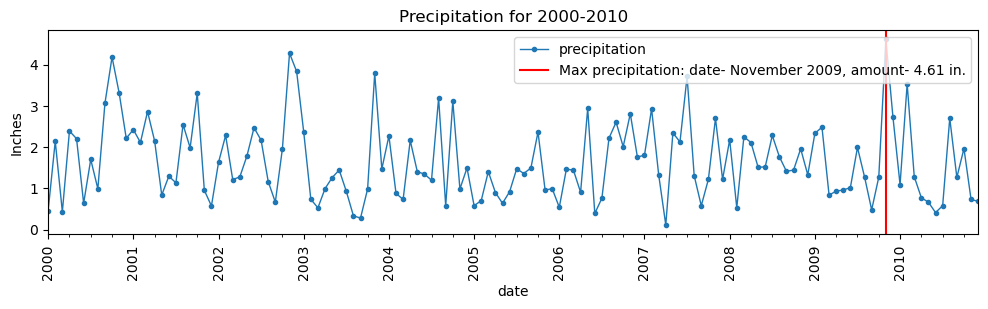

In [9]:
#Create a wide figure (e.g. figsize=(12,3))
fig, ax = plt.subplots(figsize=(12,3))

q1_monthly.plot(ax=ax,marker='.',lw=1)
#With the title "Precipitation for 2000-2010/With a ylabel of "Inches
ax.set(title = 'Precipitation for 2000-2010', ylabel = 'Inches')
#Set major ticks
'''
#Have major xaxis ticks every 1 year.
ax.xaxis.set_major_locator(mdates.YearLocator(1))
#Use 4-digit years for the labels
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# minor ticks
#Have minor xaxis ticks every 3 months
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
'''
#Add vertical line for top precipitation
ax.axvline(max_precip, color = 'red', label = f"Max precipitation: date- {max_precip.strftime('%B %Y')}, amount- {max_precip_value:,.2f} in.")
ax.legend()



#Final settings
fig = ax.get_figure()
#Rotate the major ticks' labels 90 degrees.
fig.autofmt_xdate(which = 'major', rotation = 90,ha='center');



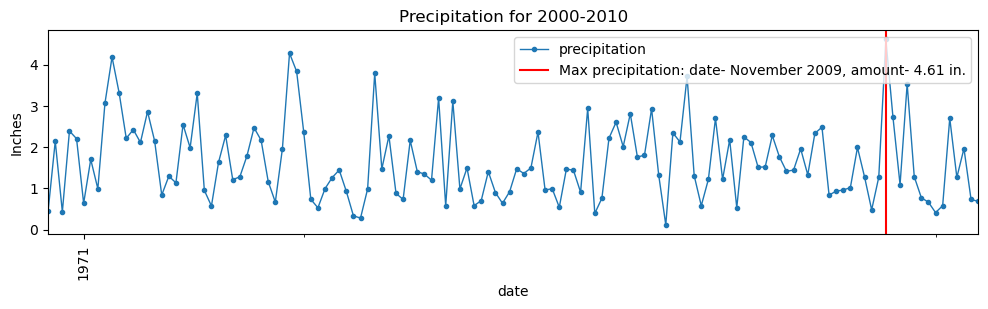

In [10]:
# shown with tick customization parameters but is not outputting correctly.
#Create a wide figure (e.g. figsize=(12,3))
fig, ax = plt.subplots(figsize=(12,3))

q1_monthly.plot(ax=ax,marker='.',lw=1)
#With the title "Precipitation for 2000-2010/With a ylabel of "Inches
ax.set(title = 'Precipitation for 2000-2010', ylabel = 'Inches')
#Set major ticks

#Have major xaxis ticks every 1 year.
ax.xaxis.set_major_locator(mdates.YearLocator(1))
#Use 4-digit years for the labels
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# minor ticks
#Have minor xaxis ticks every 3 months
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))

#Add vertical line for top precipitation
ax.axvline(max_precip, color = 'red', label = f"Max precipitation: date- {max_precip.strftime('%B %Y')}, amount- {max_precip_value:,.2f} in.")
ax.legend()

#Final settings
fig = ax.get_figure()
#Rotate the major ticks' labels 90 degrees.
fig.autofmt_xdate(which = 'major', rotation = 90,ha='center');

## Q2: Which year between 2000-2020 had the coolest average temperature?
- Resample the data as Yearly frequency.

- Determine the date and value for the lowest mean temp.

- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.



## Q2 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
- Create a wide figure (e.g. figsize=(12,3))
    - With the title "Average Temperature"
    - With a ylabel of "Degrees"
- Customize the major xaxis ticks to:
    - Have major xaxis ticks every 5 years.
    - Use 4-digit years for the labels
    - Rotate the major ticks' labels 90 degrees.
- Customize the minor xaxis ticks to:
    - Have minor xaxis ticks every 1 year
    - Do not label the minor ticks.

In [11]:

q2 = df.loc['2000':'2020', 'mean_temp']
q2_annual=q2.resample('AS').mean()
q2_annual.index

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01'],
              dtype='datetime64[ns]', name='date', freq='AS-JAN')

In [12]:
#Determine the date and value for the lowest mean temp.
min_temp = q2_annual.idxmin()
min_temp_value = q2_annual.min()

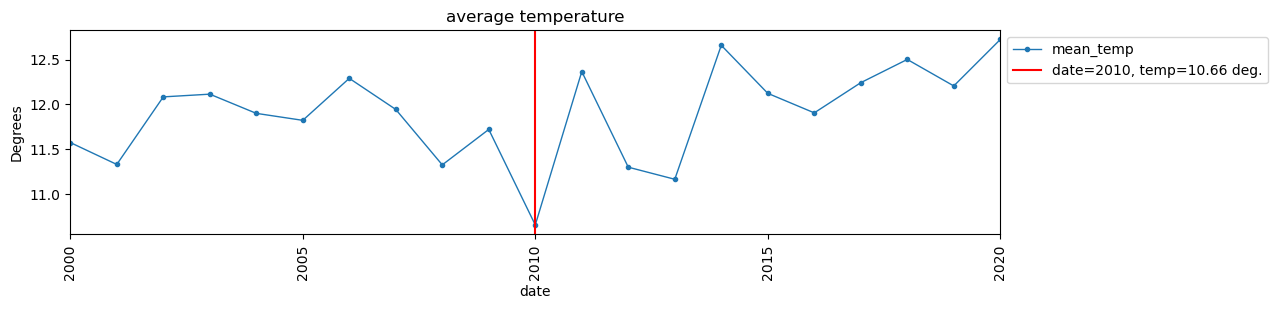

In [13]:
# again does not work with major tick parameters will post below with parameters passed in.
#Plot temperature data
# create wide figure
fig, ax = plt.subplots(figsize=(12,3))

q2_annual.plot(ax=ax,marker='.',lw=1)
# title of avg temp/ylaber degrees
ax.set(title = 'average temperature', ylabel = 'Degrees')
'''
#Set major ticks
# major ticks every 5 years
ax.xaxis.set_major_locator(mdates.YearLocator(5))
# 4 digit year format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
'''
#Set minor ticks
# minor ticks every 1 year
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

#Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.
ax.axvline(min_temp, color = 'red', label = f"date={min_temp.strftime('%Y')}, temp={min_temp_value:,.2f} deg.")
ax.legend(bbox_to_anchor=[1,1])

#Final settings
fig = ax.get_figure()
#Rotate the major ticks' labels 90 degrees.
fig.autofmt_xdate(which = 'major', rotation = 90,ha='center');

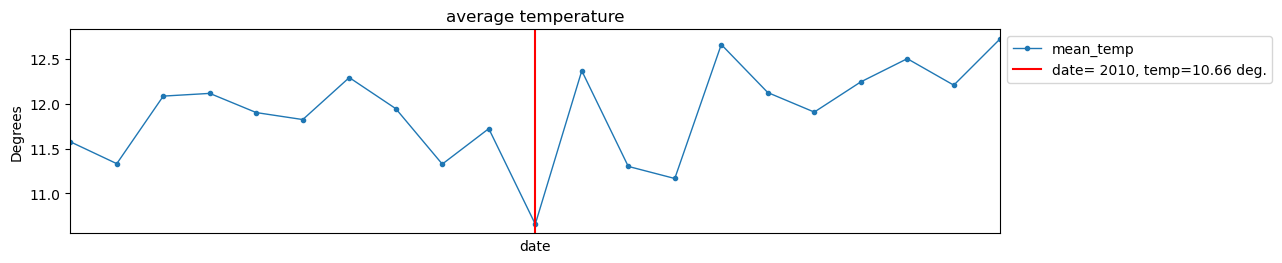

In [14]:

#Plot temperature data
# create wide figure
fig, ax = plt.subplots(figsize=(12,3))

q2_annual.plot(ax=ax,marker='.',lw=1)
# title of avg temp/ylaber degrees
ax.set(title = 'average temperature', ylabel = 'Degrees')

#Set major ticks
# major ticks every 5 years
ax.xaxis.set_major_locator(mdates.YearLocator(5))
# 4 digit year format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#Set minor ticks
# minor ticks every 1 year
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

#Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.
ax.axvline(min_temp, color = 'red', label = f"date= {min_temp.strftime('%Y')}, temp={min_temp_value:,.2f} deg.")
ax.legend(bbox_to_anchor=[1,1])

#Final settings
fig = ax.get_figure()
fig.autofmt_xdate(which = 'major', rotation = 90,ha='center');